In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [7]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df=pd.read_csv(filepath,header=0)


In [9]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,5,5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,6,6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0
7,7,7,Acer,3,2,1,5,15.0,0.551724,4,256,4.85100,866,Low,0,1
8,8,8,Dell,3,1,1,5,15.6,0.862069,4,256,5.07150,812,Low,1,0
9,9,9,Acer,3,3,1,7,15.0,0.620690,8,256,4.85100,1068,Low,0,1


In [12]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [13]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [16]:
y_data=df['Price']
x_data=df.drop('Price',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.10,random_state=1)
print("The number of test samples:",x_test.shape[0])
print("The number of train samples:",x_train.shape[0])



The number of test samples: 24
The number of train samples: 214


In [19]:
lr=LinearRegression()
lr.fit(x_train[['CPU_frequency']],y_train)
Yhat=lr.predict(x_train[['CPU_frequency']])
lr.score(x_train[['CPU_frequency']],y_train)

0.14829792099817973

In [20]:
lr.score(x_test[['CPU_frequency']],y_test)

-0.06599437350393766

In [23]:
Rcross=cross_val_score(lr,x_data[['CPU_frequency']],y_data,cv=4)
Rcross

array([-0.82012763,  0.10035872,  0.11202939, -0.03662978])

In [26]:
print(Rcross.mean())
print(Rcross.std())

-0.16109232388595118
0.3849579786664711


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.5,random_state=0)
pr=PolynomialFeatures()

In [28]:
lr=LinearRegression()
Rsqu_test=[]
order=[1,2,3,4,5]
for n in order:
    pr=PolynomialFeatures()
    x_train_pr=pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr=pr.fit_transform(x_test[['CPU_frequency']])
    lr.fit(x_train_pr,y_train)
    Rsqu_test.append(lr.score(x_test_pr,y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

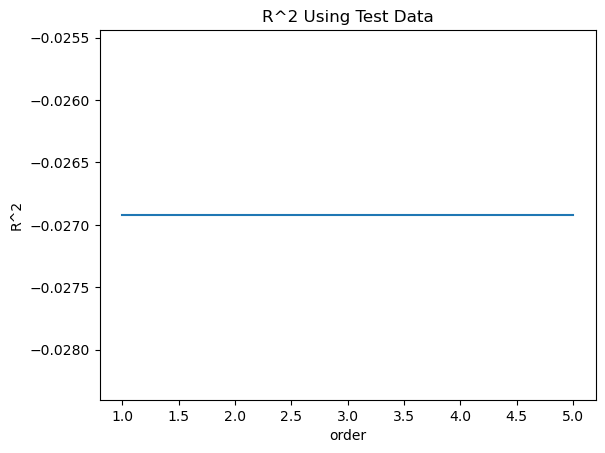

In [29]:
plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

In [30]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])


NameError: name 'tqdm' is not defined